In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd
from collections import namedtuple
import util
from scipy.stats import gaussian_kde
from scipy.spatial import distance


import glob
import pandas as pd
from matplotlib import pyplot
from math import sqrt
from numpy import concatenate
from tqdm import tqdm

In [2]:
columns = ['user','gender','age','country','registered',
            'artist','track','total_sessions','avg_session_length']

In [3]:
hps_dict = {
    'data_file' : '/data_data/session_length/nishanth01/data/user_profile_cluster.csv',
    'clusters':5
}

hps = namedtuple("HParams", hps_dict.keys())(**hps_dict)

In [4]:
def DrawDensityPlot(myVector, Name, ax, covar_factor = 0.1):
    data = myVector
    density = gaussian_kde(data)
    minData = min(data)
    maxData = max (data)
    sizeOfData = len(data)
    xs = np.linspace(minData,maxData,sizeOfData)
    density.covariance_factor = lambda : covar_factor
    density._compute_covariance()
    ax.plot(xs,density(xs))
    ax.set_title(Name)
    return ax


def computeBIC (clstrs, X):
    n = X.shape[1]
    m = X.shape[0]
    k = len(clstrs.cluster_centers_)
    Dw = np.power(clstrs.inertia_, 2)
    Db = 0
    for cc0 in range (k):
        for cc1 in range (k):
            if not cc0 == cc1:
                Db = Db + distance.euclidean (clstrs.cluster_centers_[cc0], clstrs.cluster_centers_[cc1])
    ##print "Dw = %.3f; Db = %.3f" %(Dw,Db)
    D = np.sqrt (Dw + np.power(Db, 2))
    BIC = D + np.log(n)*m*k
    AIC = D + 2*m*k    
    return BIC, AIC



def get_profile_data(hps,columns):
    complete_files = glob.glob(hps.data_file)
    dataset = pd.concat((pd.read_csv(f,names=columns,sep='\t') for f in complete_files))
    #dataset = dataset.dropna()
    values = dataset.values
    
    return values


def Get2DClusters (Xpair, N):
    km = KMeans (n_clusters=N, init='k-means++')
    clstrs = km.fit (Xpair)
    print (clstrs.cluster_centers_.shape)
    print (clstrs.cluster_centers_)
    aic, bic = computeBIC(clstrs, Xpair)
    print ('BIC = %.3f' %(bic))
    myColors = ('red', 'green', 'blue', 'magenta', 'cyan', 'k', '0.2', '0.4')
    if N > 8:
        return clstrs
    
    myClCols = np.empty(Xpair.shape[0], 'str')
    for ii in np.arange (0, len(clstrs.labels_)):
        color_index = clstrs.labels_[ii]
        myClCols[ii] = myColors[color_index]

    plt.figure(figsize = (4, 4))
    plt.scatter (Xpair[:,0], Xpair[:,1], c = myClCols)

    myCntrCol = np.empty(N, 'str')
    for ii in np.arange (0, N):
        color_index = ii
        myCntrCol[ii] = myColors[color_index]

    print (myCntrCol)
    plt.scatter (clstrs.cluster_centers_[:,0], clstrs.cluster_centers_[:,1], c = myCntrCol, s = 100)
    plt.title (str(N) + " clusters")
    plt.show()
    return clstrs


def analyze_profiles(hps):
    
    data = get_profile_data(hps,columns)
    n_clusters = hps.clusters
    
    
    km = KMeans (n_clusters=n_clusters, init='k-means++')
    clstrs = km.fit (data)
    print (clstrs.cluster_centers_.shape)
    print (clstrs.cluster_centers_)    
    
    
    fig, axes = plt.subplots(nrows=3, ncols=3, sharex=False, sharey=False, figsize = (30, 40))

    k = 0
    for i in range(3):
        for j in range(3):
            ax = axes[i][j]
            #ax.hist(data[:,k])
            ax = DrawDensityPlot(data[:,k], Name = columns[k], ax = ax, covar_factor = 0.1125)
            ax.scatter (x = clstrs.cluster_centers_[:,k], y = np.zeros(n_clusters), c = 'red', s = 100)
            ax.set_title(columns[k])
            ax = axes[i][j]
            k += 1

    plt.show()    

(5, 9)
[[ 5.36753488e+02  3.30232558e-01  6.57674419e+00  1.47162791e+01
   1.17529759e+09  2.80865581e+03  2.80406307e+05  4.17488372e+02
   7.33423135e+03]
 [ 5.16571429e+02 -1.00000000e+00  0.00000000e+00  1.77635684e-15
   0.00000000e+00  9.20000000e+02  5.13727429e+05  1.00528571e+03
   4.72249143e+03]
 [ 4.91362832e+02  3.93805310e-01  1.02876106e+01  1.01460177e+01
   1.11756680e+09  2.42530973e+03  2.81219283e+05  1.00893363e+03
   6.45133212e+03]
 [ 4.81097015e+02  4.25373134e-01  8.13930348e+00  1.39701493e+01
   1.14433791e+09  1.93426617e+03  2.60852925e+05  7.50328358e+02
   6.77858147e+03]
 [ 5.89258621e+02  5.00000000e-01  4.79310345e+00  8.44827586e+00
   1.08342174e+09  1.82232759e+03  3.07906293e+05  9.24120690e+02
   6.27139103e+03]]


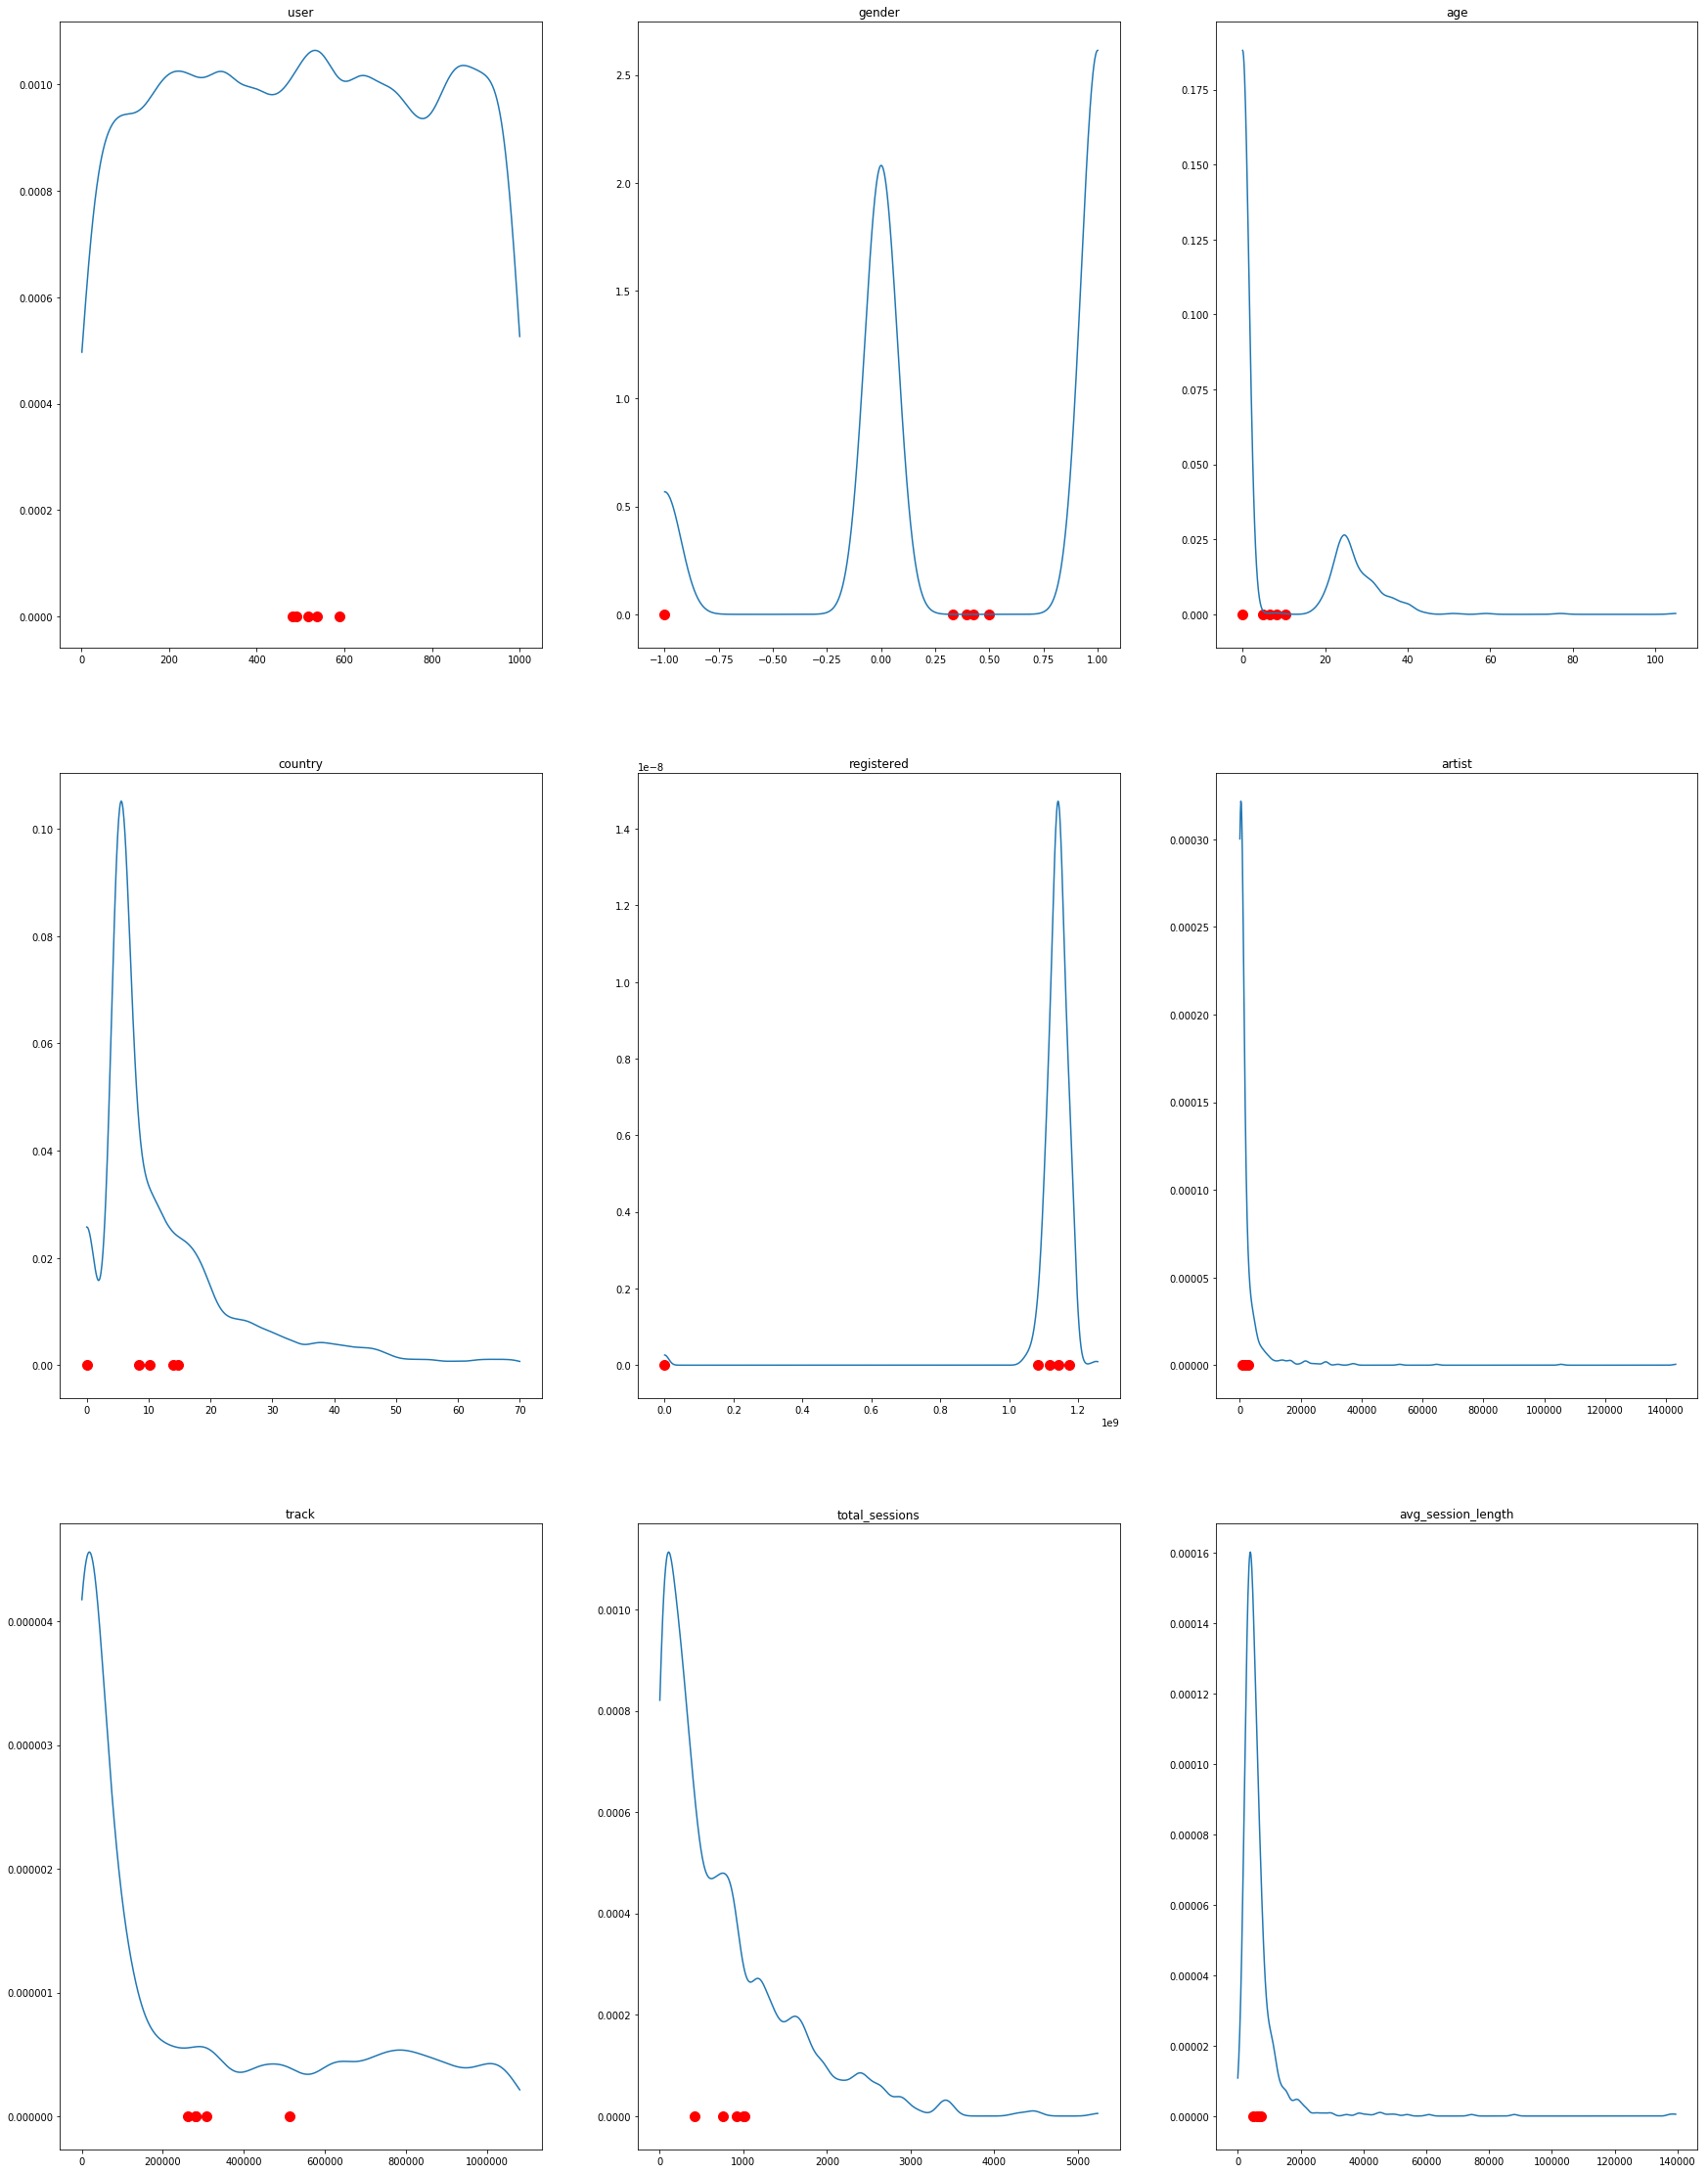

In [5]:
analyze_profiles(hps)

(5, 2)
[[   495.79029463   3726.39332756]
 [   553.76923077  51028.05153846]
 [   535.82692308  17938.68211538]
 [   844.         138451.67      ]
 [   510.69318182   8081.2130303 ]]
BIC = 5527343433.863
['r' 'g' 'b' 'm' 'c']


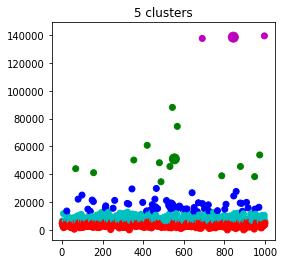

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
data = get_profile_data(hps,columns)
Xpair = data[:,(0,8)]
Get2DClusters(Xpair, N = 5)

In [ ]:
fig, axes = plt.subplots(nrows=data.shape[1], ncols=data.shape[1], sharex=False, sharey=False, figsize = (30, 30))

for f1 in np.arange (data.shape[1]):
    for f2 in np.arange (data.shape[1]):
        if not f1 == f2:
            ax = axes[f1, f2]
            ax.scatter (data[:,f1], data[:,f2])
            ax.set_title (columns[f1] + " vs " + columns[f2])
            
plt.show()